In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
visa_df = pd.read_csv("Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Box-plot**

- box plot is used for detect outliers

- box plot has min Q1 ,Q2 ,Q3 and max values

- inside box plot red line represent median which 50 % of data


**outlier**

    - very very huge observation 

    - very very small odservation 

    - which pull the data in side of the distribution

    - mild outliers

        - Q1-1.5/QR and Q3+1.5 iQr

    - strong ouliers

      - q1-3 / IQR and q3+3 IQR

    - IQR = inter quartile range


      - IQR = Q3 - Q1

q1:25

q2 : 50

q3 : 75



In [ ]:
  Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

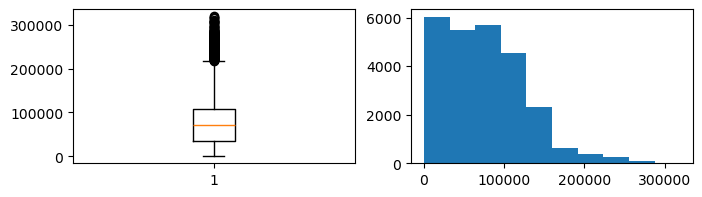

In [18]:
plt.figure(figsize=(8,2))
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage']) 
plt.show()

<Axes: >

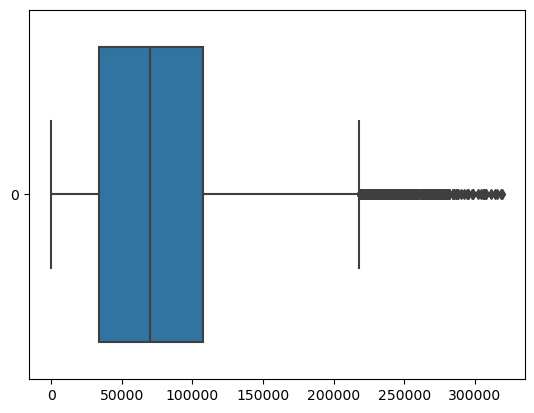

In [10]:
sns.boxplot(visa_df['prevailing_wage'],
            orient='h')

**Finding the outliers**

- outliers are avaialble less then Q1-1.5 * iQr

- outlier are avilable greater then Q3 + 1.5*IQR

- step1:

   - cal q1

   - cal q3

   - cal  IQR : Q1-Q3


- step-2:

  - LB = Q1-1.5*IRQ


  - UB=Q3+1.5*IQR


- step-3

   - con1 = visa_df['prevailing_wage']< lb

    - con2 = visa_df['prevailing_wage']<lb

   - con3 = visa_df['prevailing_wage']<lb

    - apply OR opera and get the outlier data



In [21]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [25]:
Q1 = round(np.percentile(visa_df['prevailing_wage'],25),2)
Q2 = round(np.percentile(visa_df['prevailing_wage'],50),2)
Q3 = round(np.percentile(visa_df['prevailing_wage'],75),2)

IQR = Q3-Q1

LB = Q1-1.5*IQR
UB = Q3+1.5*IQR

con1 = visa_df['prevailing_wage']<LB

con2 = visa_df['prevailing_wage']>UB


outlier_df = visa_df[con1 | con2]

len(outlier_df)



25480

In [24]:
Q1 = round(np.percentile(visa_df['prevailing_wage'],25),2)
Q2 = round(np.percentile(visa_df['prevailing_wage'],50),2)
Q3 = round(np.percentile(visa_df['prevailing_wage'],75),2)

IQR = Q3-Q1

LB = Q1-1.5*IQR
UB = Q3+1.5*IQR

con1 = visa_df['prevailing_wage']>LB

con2 = visa_df['prevailing_wage']<UB


non_outlier_df = visa_df[con1 & con2]

len(non_outlier_df)



25053

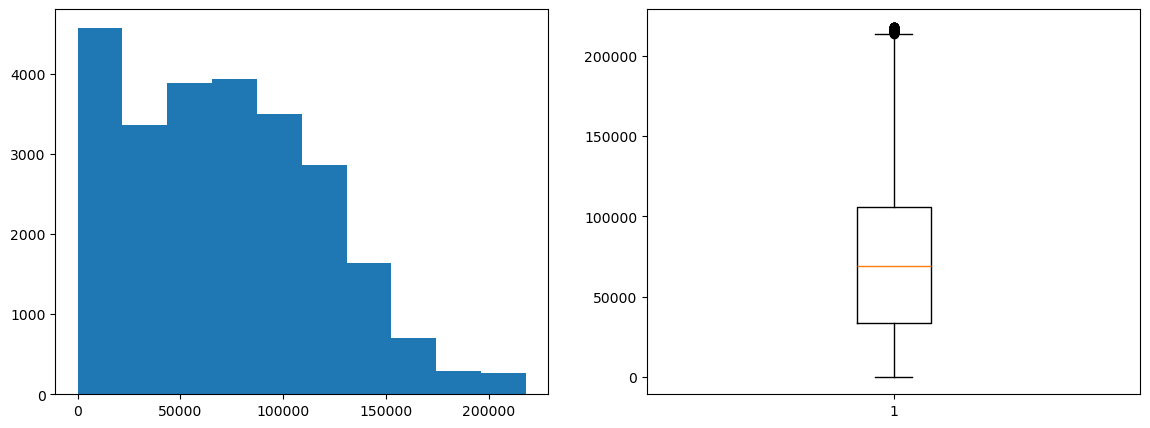

In [26]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(non_outlier_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outlier_df['prevailing_wage'])
plt.show()

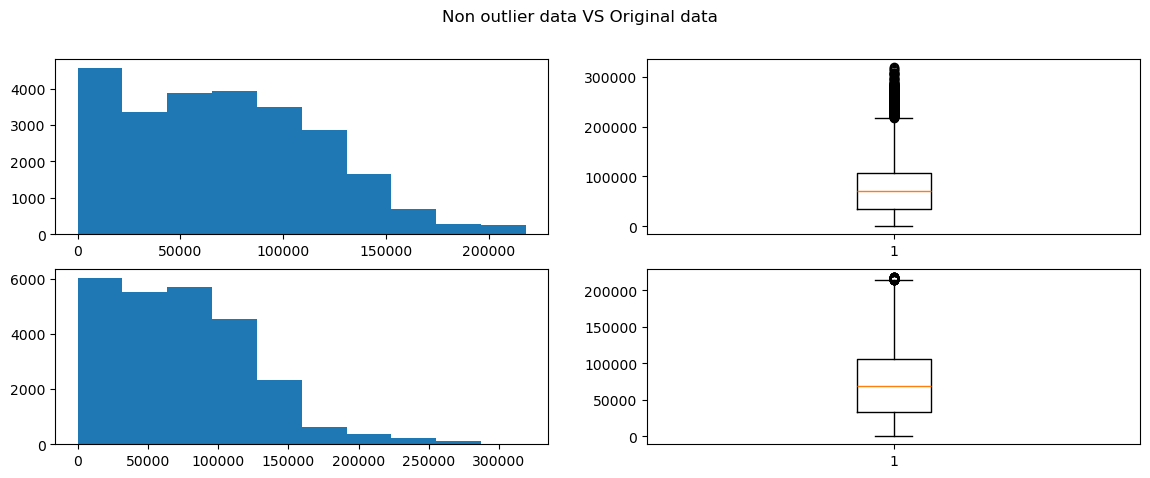

In [31]:
plt.figure(figsize=(14,5))
plt.suptitle('Non outlier data VS Original data')
plt.subplot(2,2,1).hist(non_outlier_df['prevailing_wage'])
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])


plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(non_outlier_df['prevailing_wage'])
plt.show()

**same plot two data**

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,1).hist(non_outlier_df['prevailing_wage'])
plt.subplot(1,2,2).boplot(non_outlier_df['prevailing_wage'])
plt.show()

**how to deal the outlier**`

In [ ]:
**method-1 : Drop the outliers**

  - drop the outliers is not a good idea

  -  when you drop the outliers , data will loss

   -  for example here we are droping 427

  - X% of 25480 = 427

  -  it is 1.7% data ,here it is fine we can drop the outliers

**method-2 : fill with median values**

    - we already know that outerlier does not affect the median

    - so we can fill outlier by mean

**method-3  : cap the values with q1 and Q2

- all less than 



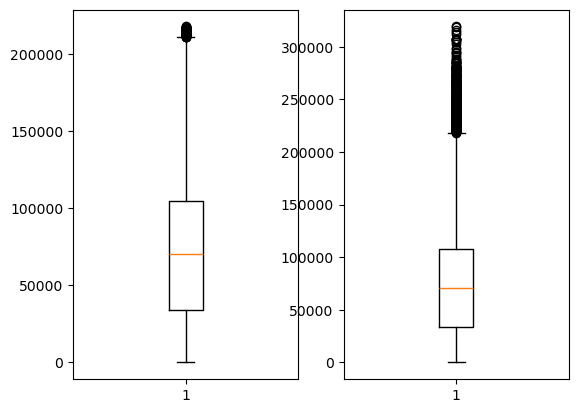

In [59]:
list=[]
median_val = visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage'].values:
    if i< LB or i> UB:
        list.append(median_val)
    else:
        list.append(i)

visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = list
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**np.where**


- np.where will use for binary condition 

- it has 3 arg 

  - condition

   - if condition is true

   - if condition is false



In [50]:
d = {"sub":["DS","ML","CS"],
    "marks":[100,150,20]}

data=pd.DataFrame(d)

data

,sub,marks
0,DS,100
1,ML,150
2,CS,20


In [52]:
con = data['marks']>100
l=np.where(con,1,data['marks'])
l

array([100,   1,  20], dtype=int64)

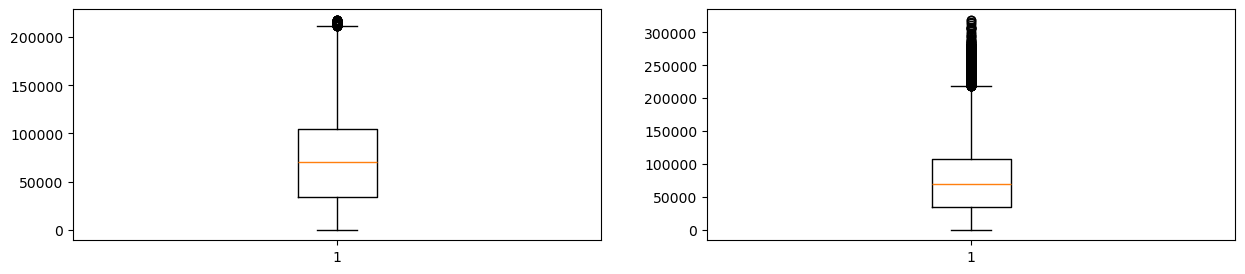

In [61]:
plt.figure(figsize=(15,3))
con19= visa_df['prevailing_wage']>LB 
con10 = visa_df['prevailing_wage']>UB
con2 = con19|con10

m = visa_df['prevailing_wage'].median()
new_data=np.where(con2,
                 m,
                 visa_df['prevailing_wage'])
visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = list
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()